# **Importing libraries**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Loading the dataset**

In [12]:
data = pd.read_excel('/content/advertising_sales_data.xlsx')
data

,Campaign,TV,Radio,Newspaper,Sales
0,camp1,230.1,37.8,69.2,22.1
1,camp2,44.5,39.3,45.1,10.4
2,camp3,17.2,45.9,69.3,12.0
3,camp4,151.5,41.3,58.5,16.5
4,camp5,180.8,10.8,58.4,17.9
...,...,...,...,...,...
195,camp196,38.2,3.7,13.8,7.6
196,camp197,94.2,4.9,8.1,14.0
197,camp198,177.0,9.3,6.4,14.8
198,camp199,283.6,42.0,66.2,25.5


In [13]:
#checking the data types of each feature
data.dtypes

,0
Campaign,object
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


# **Handling missing values**

In [14]:
#checking if there are null values
print(data.isnull().sum())

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(data.iloc[:,[2]])
data.iloc[:,[2]] = imputer.transform(data.iloc[:,[2]])

In [16]:
print(data.isnull().sum())

Campaign     0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# **1. Average amount spent on TV advertising in the dataset**

In [17]:
avg_tv_spending = data['TV'].mean()
print(avg_tv_spending)

147.0425


# **2.	What is the correlation between radio advertising expenditure and product sales?**

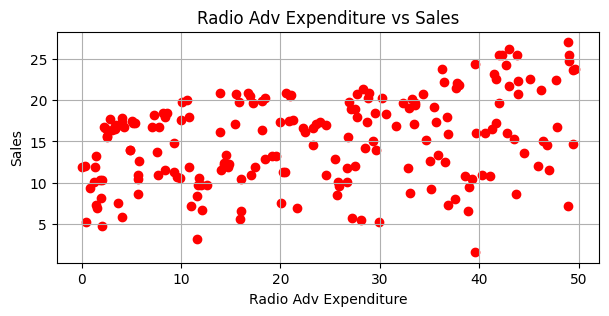

In [18]:
plt.figure(figsize=(7,3))
plt.scatter(data['Radio'].values, data['Sales'].values, color='r')
plt.title('Radio Adv Expenditure vs Sales')
plt.xlabel('Radio Adv Expenditure')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Scatter plots suggests a relationship that is not exactly linear, but somewhat monotonic. Hence, using Spearman's Correlation is the best.

In [20]:
correlation = data['Radio'].corr(data['Sales'])
print(correlation)

0.3496507429302875


**Analysis**

The correlation between Radio Advertising Expenditure and Sales is 0.34965

This indicates that there is a positive relationship between the two features, but it is weak or not very consistent, i.e., an increase in Radio Advertising Expenditure might lead to a slight increase in sales, but it might not increase by a huge margin in a consistent manner

# **3. Advertising medium that has the highest impact on sales**

In [21]:
correlations = data[['TV', 'Radio', 'Newspaper']].corrwith(data['Sales'], method='spearman')
print(correlations)

TV           0.900996
Radio        0.340017
Newspaper    0.123027
dtype: float64


**Analysis**

It can be seen that advertising via TV has the highest impact on sales. Thus, it can be understood that people are most influenced by TV advertisements and hence sellers can strategize accordingly to boost their sales.

# **4. Plotting a Linear Regression Line to predict Sales and visualize the model's predictions against actual values**

Splitting the dataset

In [22]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Train a linear regression model

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

Visualize the regression line for the training set

Mean Squared Error: 2.4092185773771497
R-squared: 0.8747286106321062


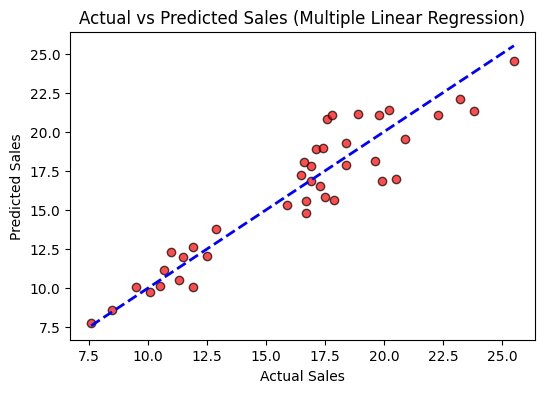

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the actual vs. predicted sales values
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='red', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (Multiple Linear Regression)')
plt.show()

**Analysis**

Most data points in the Actual vs. Predicted plot are clustered around the regression line, indicating that the model is reasonably accurate.

However, deviations become more pronounced as Actual Sales increase, suggesting that the model’s accuracy declines at higher sales values.

Overall, the model performs well at lower and intermediate sales levels but requires improvement for higher values.

# **5. Prediction for a new set of Advertising Expenditures**


In [29]:
new_data = [[200, 40, 50]]

# Predict the sales for new data
predicted_sales = regressor.predict(new_data)

print(f"Predicted Sales: {predicted_sales[0]:.2f}")

Predicted Sales: 19.73


**Analysis**

For the given expenditure across various advertising mediums, the predicted sales value is $19.73.

# **6. Performance of the linear regression model when the dataset is normalized**

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Splitting data
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model on normalized data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Normalized): {mse}")
print(f"R-squared (Normalized): {r2}")


Mean Squared Error (Normalized): 2.9074318865000572
R-squared (Normalized): 0.9059117026092903


**Analysis**

The Mean Squared Error (MSE) and R-squared (R²) values of the model increase from 2.409 and 0.874, respectively, without normalization, to 2.907 and 0.905 with normalization.

Normalization scales all features in the dataset, which can sometimes lead to skewed results. This is because scaling certain features might negatively impact overall model performance.

Additionally, the slight increase in error could be due to the distortion of linear relationships among features after normalization.

# **7. Impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors**

In [ ]:
X_reduced = data[['Radio', 'Newspaper']]
y = data['Sales']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train the model
model_reduced = LinearRegression()
model_reduced.fit(X_train, y_train)

# Predict and evaluate
y_pred_reduced = model_reduced.predict(X_test)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)

print(f"Mean Squared Error without TV: {mse_reduced}")
print(f"R-squared without TV: {r2_reduced}")


Mean Squared Error without TV: 27.50240015808231
R-squared without TV: 0.10998637077378115


**Analysis**

Among all advertising mediums, TV shows the strongest correlation with Sales, indicating that it plays the most significant role in reaching a broad audience and driving sales.

As a result, removing TV from the linear regression model weakens its predictive power and increases error values. As expected, excluding TV leads to a sharp rise in both the Mean Squared Error (MSE) and R-squared (R²) values.